In [17]:
import torch
import torch.nn as nn

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('../utils')
from dataloader import featurize
import torch.nn.functional as F

In [13]:
class SimpleNet(nn.Module):
    def __init__(self, num_channels, history_length, num_actions):
        super(SimpleNet, self).__init__()
        self.conv1 = nn.Conv2d(num_channels*history_length, 64, kernel_size=5, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1)
        self.fc4 = nn.Linear(4*4*256, 512)
        self.fc5 = nn.Linear(512, num_actions)

    def forward(self, x):
        x1 = F.relu(self.conv1(x))
        x2 = F.relu(self.conv2(x1))
        x3 = F.relu(self.conv3(x2))
        x = F.relu(self.fc4(x3.view(x3.size(0), -1)))
        return self.fc5(x), x1, x2, x3


In [14]:
npy = np.load('../dataset/intelligent_bfs/test_run_0000000000.npz')

In [15]:
num_actions = 9
history_length = 1
num_channels = 8

model_conv = SimpleNet(num_channels, history_length, num_actions)
model_conv = torch.load('../weights/intelligent_bfs_guard_sim.pt')

/home/galen-post/sverma/.local/lib/python3.6/site-packages/torch/serialization.py:391: UserWarning: Couldn't retrieve source code for container of type SimpleNet. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


In [11]:
frame = npy['runs'][0]
feat = featurize(frame)

In [23]:
inp = torch.from_numpy(np.asarray([feat])).float().cuda()

In [24]:
out, x1, x2, x3 = model_conv(inp)

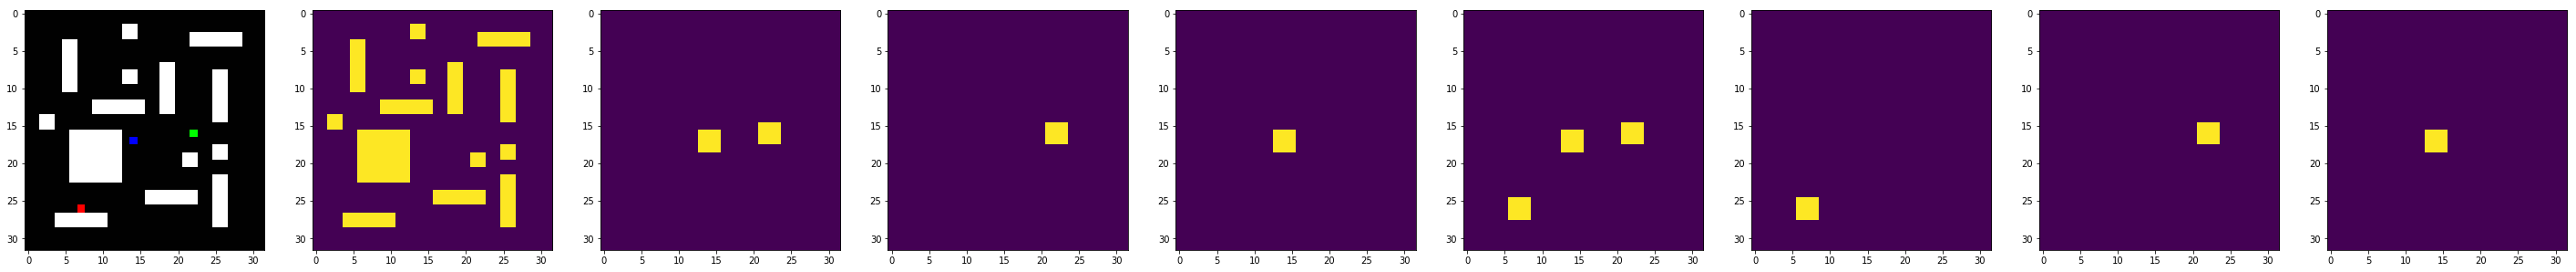

In [34]:
f = plt.figure(figsize=(50,50))
plt.subplot(1, 9, 1)
plt.imshow(frame)
plt.subplot(1, 9, 2)
plt.imshow(feat[0])
plt.subplot(1, 9, 3)
plt.imshow(feat[1])
plt.subplot(1, 9, 4)
plt.imshow(feat[2])
plt.subplot(1, 9, 5)
plt.imshow(feat[3])
plt.subplot(1, 9, 6)
plt.imshow(feat[4])
plt.subplot(1, 9, 7)
plt.imshow(feat[5])
plt.subplot(1, 9, 8)
plt.imshow(feat[6])
plt.subplot(1, 9, 9)
plt.imshow(feat[7])

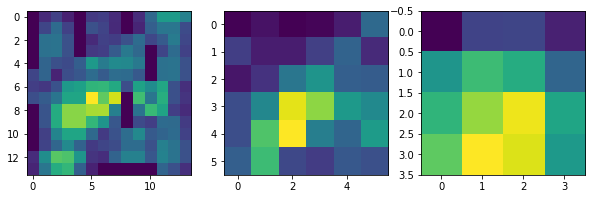

In [38]:
v1 = x1.data.cpu().numpy()[0].mean(axis=0)
v2 = x2.data.cpu().numpy()[0].mean(axis=0)
v3 = x3.data.cpu().numpy()[0].mean(axis=0)

f = plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(v1)
plt.subplot(1, 3, 2)
plt.imshow(v2)
plt.subplot(1, 3, 3)
plt.imshow(v3)